In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import json
from pprint import pprint

In [2]:
outbreak_df = pd.read_csv("Cleaned_outbreak_data.csv")
outbreak_df

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
0,2020,1,Wisconsin,Person-to-person,Norovirus Genogroup II,Confirmed,Other healthcare facility,6,0.0,6.0,0.0,6
1,2020,1,Nebraska,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,20,1.0,20.0,0.0,20
2,2020,1,New York,Food,Clostridium perfringens,Suspected,Caterer (food prepared off-site from where ser...,7,0.0,7.0,0.0,7
3,2020,1,New Mexico,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,18,0.0,18.0,0.0,18
4,2020,1,Minnesota,Person-to-person,Norovirus unknown,Suspected,Long-term care/nursing home/assisted living fa...,95,1.0,95.0,2.0,95
...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2021,7,Kansas,Food,Cyclospora cayetanensis,Confirmed,Restaurant - Sit-down dining,9,1.0,8.0,0.0,9
2605,2021,8,Kansas,Food,Salmonella enterica,Confirmed,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2
2606,2021,11,Multistate,Food,Listeria monocytogenes,Confirmed,Unknown,7,7.0,7.0,3.0,7
2607,2021,5,Arizona,Person-to-person,Norovirus Genogroup II,Suspected,Ship/boat,19,0.0,19.0,0.0,19


In [98]:
et_year = outbreak_df.groupby(["Etiology"])

hosp_ets = pd.DataFrame(et_year["Hospitalizations"].sum())
hosp_ets = hosp_year.sort_values(by=["Hospitalizations"],ascending = False)
hosp_ets

,Hospitalizations
Etiology,
Salmonella enterica,1707.0
Norovirus unknown,355.0
Norovirus Genogroup II,189.0
"Escherichia coli, Shiga toxin-producing",172.0
Legionella pneumophila,168.0
...,...
Norovirus; Astrovirus; Sapovirus,0.0
"Salmonella unknown; Escherichia coli, Enterotoxigenic",0.0
Salmonella unknown; Salmonella unknown,0.0


In [101]:
hosp_ets_top_10 = pd.DataFrame(hosp_ets["Hospitalizations"].nlargest(10))
hosp_ets_top_10 

,Hospitalizations
Etiology,
Salmonella enterica,1707.0
Norovirus unknown,355.0
Norovirus Genogroup II,189.0
"Escherichia coli, Shiga toxin-producing",172.0
Legionella pneumophila,168.0
Listeria monocytogenes,105.0
Norovirus,96.0
Norovirus Genogroup II; Norovirus Genogroup II,65.0
Shigella flexneri,49.0


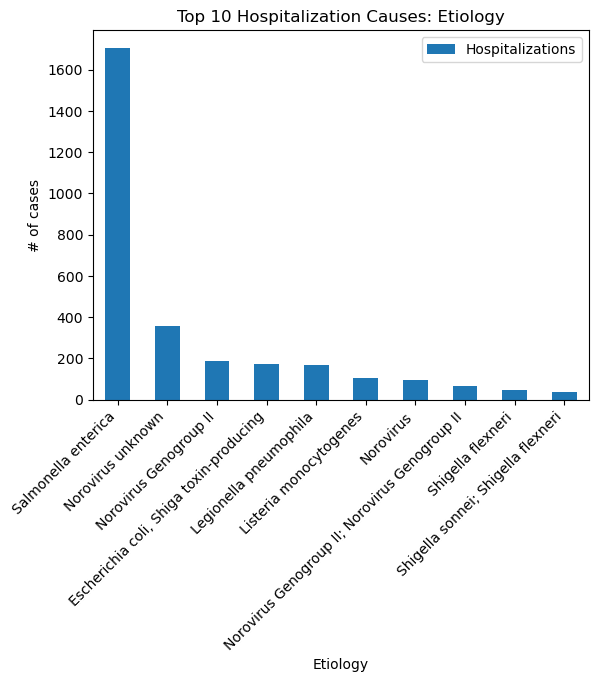

In [102]:
hosp_ets_top_10.plot(  kind="bar", xlabel="Etiology", ylabel = "# of cases", title = "Top 10 Hospitalization Causes: Etiology")
plt.xticks(rotation = 45, ha="right")
plt.show()

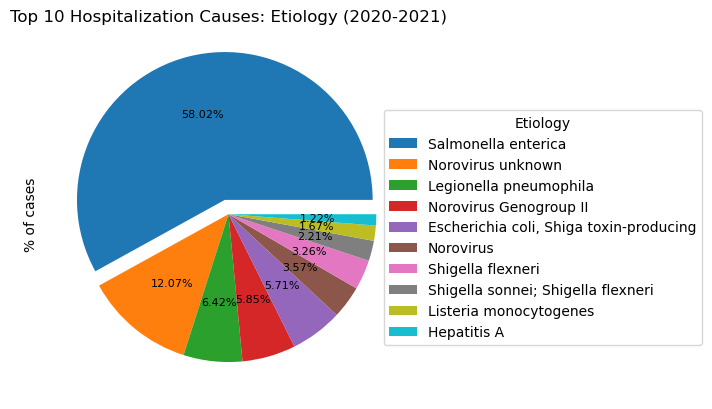

In [121]:

explode = (.1,0,0,0,0,0,0,0,0,0)
hosp_ets_top_10.plot(  kind="pie", y="Hospitalizations", title = "Top 10 Hospitalization Causes: Etiology (2020-2021)", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0)
plt.legend(loc="upper right", labels = df_hosp_2020_top_10.index, bbox_to_anchor=(1.8,.8),title="Etiology")
plt.ylabel("% of cases")

plt.show()

In [105]:
ill_ets = pd.DataFrame(et_year["Illnesses"].sum())
ill_ets = ill_ets.sort_values(by=["Illnesses"],ascending = False)
ill_ets

,Illnesses
Etiology,
Norovirus unknown,17424
Norovirus Genogroup II,11536
Salmonella enterica,8382
Norovirus,7458
Norovirus Genogroup II; Norovirus Genogroup II,1141
...,...
Campylobacter jejuni; Norovirus unknown,2
Shigella,2
Campylobacter unknown; Campylobacter jejuni,2


In [109]:
ill_ets_top10 = pd.DataFrame(ill_ets["Illnesses"].nlargest(10))
ill_ets_top10

,Illnesses
Etiology,
Norovirus unknown,17424
Norovirus Genogroup II,11536
Salmonella enterica,8382
Norovirus,7458
Norovirus Genogroup II; Norovirus Genogroup II,1141
Norovirus Genogroup I,932
"Escherichia coli, Shiga toxin-producing",704
Bacillus cereus,544
Clostridium perfringens,486


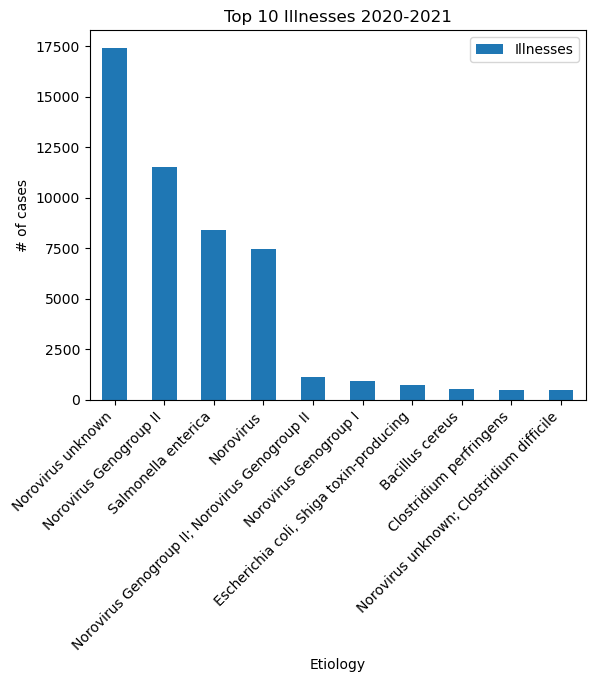

In [113]:
ill_ets_top10.plot(  kind="bar", xlabel="Etiology", ylabel = "# of cases", title = "Top 10 Illnesses 2020-2021")
plt.xticks(rotation = 45, ha="right")
plt.show()

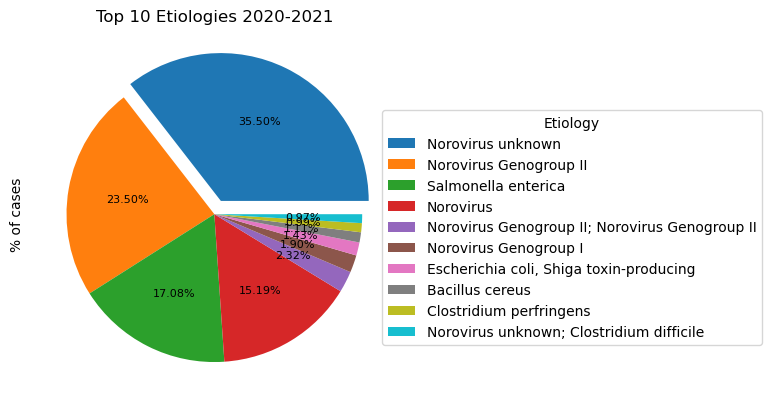

In [120]:
explode = (.1,0,0,0,0,0,0,0,0,0)
ill_ets_top10.plot(  kind="pie", y="Illnesses", title = "Top 10 Etiologies 2020-2021", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0)
plt.legend(loc="upper right", labels = ill_ets_top10.index, bbox_to_anchor=(2,.8), title="Etiology")
plt.ylabel("% of cases")

plt.show()